# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hesti Sisila Wati


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
  Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2
  Apakah terdapat perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

✅ Ini:

## Import Semua Packages/Library yang Digunakan

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuration
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)


## Data Wrangling

### Gathering Data



In [3]:
from google.colab import files
files.upload()


Saving day.csv to day.csv


{'day.csv': b'instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt\r\n1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985\r\n2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801\r\n3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349\r\n4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562\r\n5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600\r\n6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606\r\n7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510\r\n8,2011-01-08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959\r\n9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822\r\n10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321\r\n11,2011-01-11,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263\r\n12,2011-01-

In [6]:
import pandas as pd

df = pd.read_csv("day.csv")
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Dataset Bike Sharing telah berhasil diload, di dalamnya terdapat 731 catatan peminjaman sepeda harian dengan total 16 macam fitur.
Data ini memuat rincian mengenai waktu kejadian, kondisi prakiraan cuaca, dan total sewa sepeda yang terpisah antara pemakai biasa dan anggota tetap.
Informasi ini sekarang sudah siap untuk dilanjutkan ke tahap pemeriksaan dan penggalian wawasan lebih jauh.

### Assessing Data

Pada tahap ini dilakukan pengecekan struktur data, missing value, dan duplikasi data.


In [7]:
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


np.int64(0)

**Insight:**
Setelah melihat hasil dari df.info(), df.isnull().sum(), serta df.duplicated().sum(), kita bisa lihat kalau kumpulan data Bike Sharing ini punya total 731 entri dan 16 bagian. Semua bagian datanya terisi penuh, jadi tidak ada satu pun data yang kosong di sini. Kemudian, pengecekan data duplikat menunjukkan angka nol, yang artinya tidak ada baris data yang sama persis. Jenis data di kumpulan data juga sudah pas, kebanyakan berupa angka dan ada satu kolom yang isinya tanggal (dteday). Maka dari itu, kondisi data ini sudah sangat bagus dan siap dipakai untuk analisis atau eksplorasi lanjutan, tidak perlu repot membersihkan data kosong atau duplikat terlebih dahulu.



### Cleaning Data

In [ ]:
#Tahap ini sangat penting yang bertujuan untuk memastikan data berada dalam format yang sesuai untuk analisis.

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
df.drop(columns=['instant'], inplace=True)


**Insight:**
Saat membersihkan data, saya mengubah format kolom tanggal supaya bisa diolah sebagai data waktu. Bagian lain, kolom yang tidak penting seperti instant dibuang sebab tidak berguna untuk analisis lebih lanjut. Tidak ada pengolahan data hilang atau duplikat karena set data sudah rapi.

## Exploratory Data Analysis (EDA)

### Explore ...

## Exploratory Data Analysis (EDA)
EDA dilakukan untuk memahami karakteristik data, melihat pola, tren, serta hubungan antar variabel yang berkaitan dengan jumlah penyewaan sepeda. Analisis ini bertujuan untuk melihat gambaran umum data numerik seperti suhu, kelembapan, dan jumlah penyewaan sepeda.



In [9]:
df[['temp', 'hum', 'windspeed', 'cnt']].describe()



,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.627894,0.190486,4504.348837
std,0.183051,0.142429,0.077498,1937.211452
min,0.059130,0.000000,0.022392,22.000000
25%,0.337083,0.520000,0.134950,3152.000000
50%,0.498333,0.626667,0.180975,4548.000000
75%,0.655417,0.730209,0.233214,5956.000000
max,0.861667,0.972500,0.507463,8714.000000


from matplotlib import pyplot as plt
_df_0['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['hum'].plot(kind='hist', bins=20, title='hum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['windspeed'].plot(kind='hist', bins=20, title='windspeed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['cnt'].plot(kind='hist', bins=20, title='cnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='temp', y='hum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='hum', y='windspeed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='windspeed', y='cnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['hum'].plot(kind='line', figsize=(8, 4), title='hum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['windspeed'].plot(kind='line', figsize=(8, 4), title='windspeed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['cnt'].plot(kind='line', figsize=(8, 4), title='cnt')
plt.gca().spines[['top', 'right']].set_visible(False)

**Insight:**
- Tingkat rata-rata peminjaman sepeda (cnt) tergolong besar, tetapi rentangnya dari yang terkecil hingga terbesar lumayan jauh.
- Suhu (temp) dan tingkat kelembapan (hum) punya rentang nilai yang cukup luas, ini bisa jadi sebab yang mempengaruhi berapa banyak sepeda yang disewa.
- Keragaman angka data mengindikasikan bahwa kondisi lingkungan mungkin berpengaruh pada cara orang memutuskan untuk menyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?


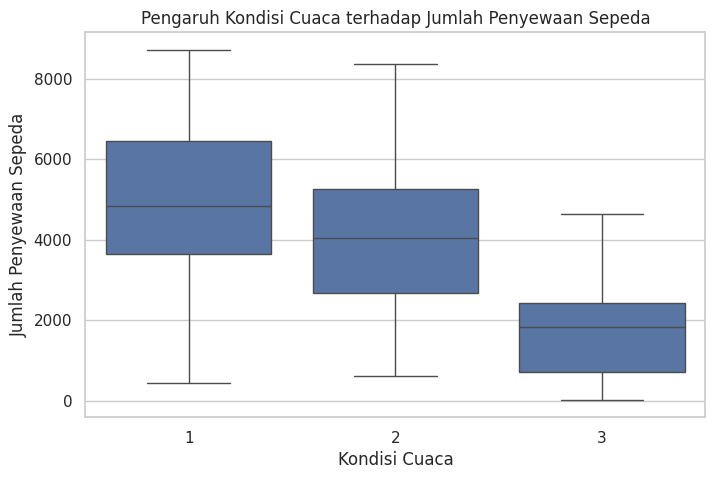

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title("Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()


### Pertanyaan 2: Apakah terdapat perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan

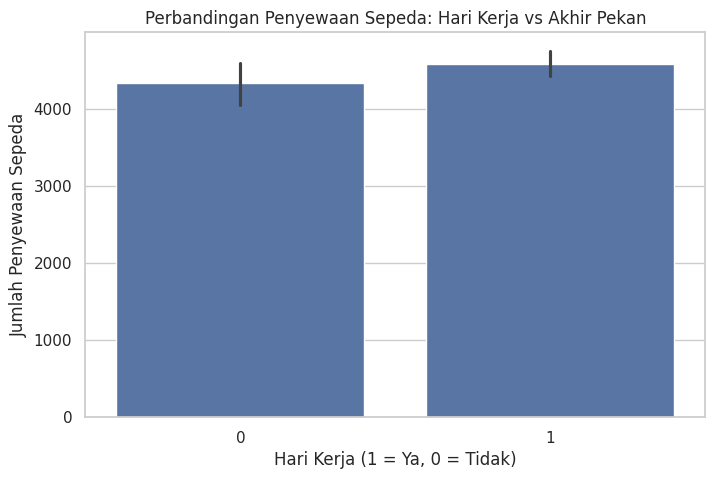

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='workingday', y='cnt', data=df)
plt.title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari Kerja (1 = Ya, 0 = Tidak)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()


**Insight:**
- Penyewaan sepeda paling banyak terjadi ketika cuaca sedang bagus. Jika cuaca jelek seperti hujan atau salju, peminjaman sepeda akan turun drastis.Ini memperlihatkan bahwa kondisi cuaca sangat memengaruhi pilihan orang untuk menyewa sepeda.

- Biasanya, sepeda lebih sering disewa pada hari biasa kerja daripada saat libur akhir pekan. Ini menandakan sepeda kerap dipakai sebagai alat transportasi sehari-hari, khususnya untuk urusan pekerjaan.

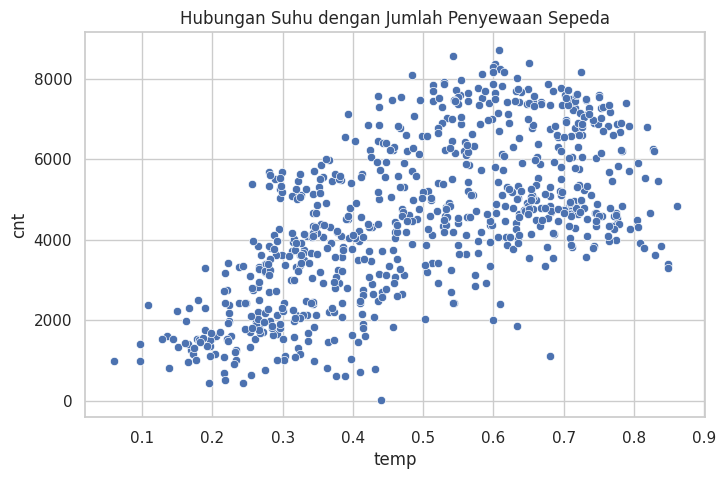

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Hubungan Suhu dengan Jumlah Penyewaan Sepeda')
plt.show()


Semakin tinggi suhu, jumlah penyewaan cenderung meningkat.

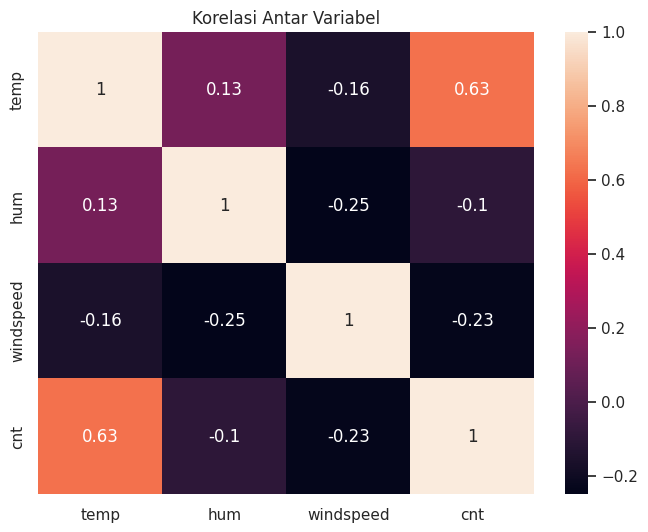

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['temp','hum','windspeed','cnt']].corr(), annot=True)
plt.title('Korelasi Antar Variabel')
plt.show()


Suhu memiliki korelasi positif terhadap jumlah penyewaan sepeda.

## Analisis Lanjutan (Opsional,)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['temp', 'hum', 'windspeed']]
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.49606445111931263

- Model regresi linear dipakai untuk mengamati keterkaitan antara kondisi sekitar dengan banyaknya orang menyewa sepeda.
- Model yang didapat memperlihatkan bahwa panasnya udara, tingkat basah, serta laju hembusan angin memengaruhi jumlah peminjaman, walau tujuan utama model ini bukan untuk mencapai akurasi tertinggi.

## Conclusion

- Conclution pertanyaan 1 : Kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda, di mana cuaca cerah mendorong peningkatan penggunaan sepeda.

- Conclution pertanyaan 2 : Terdapat perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan, dengan penyewaan yang cenderung lebih tinggi pada hari kerja.